In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scanpy as sc
from scipy.sparse import csr_matrix
import anndata

In [2]:
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')

In [3]:
adata = anndata.read_h5ad('2 filtered_normalised_scaled_centered_mou_0829.h5ad')

In [7]:
anno = pd.read_csv('mou_anno.txt', delimiter='\t')
anno

,Cluster,DPcolor,CellLabel,CellType,Dev_Branch
0,0,'#df583c',9,Erythroblasts,Erythropoieisis
1,1,'#7570b3',1,HSPCs,Hematopoieisis
2,2,'#cf4a2f',4,Myeloblasts,Granulopoieisis
3,3,'#ef6548',9,Erythroblasts,Erythropoieisis
4,4,'#c03d23',5,Myelocytes,Granulopoieisis
5,5,'#df583c',6,Neutrophils,Granulopoieisis
6,6,'#1b9e77',9,Erythroblasts,Erythropoieisis
7,7,'#984ea3',9,Erythroblasts,Erythropoieisis
8,8,'#5643ad',2,Monoblasts,Granulopoieisis
9,9,'#6655a1',9,Erythroblasts,Erythropoieisis


In [8]:
sc.tl.pca(adata, use_highly_variable=True, svd_solver='arpack', n_comps=32, random_state=0)

computing PCA
    on highly variable genes
    with n_comps=32
    finished (0:00:01)


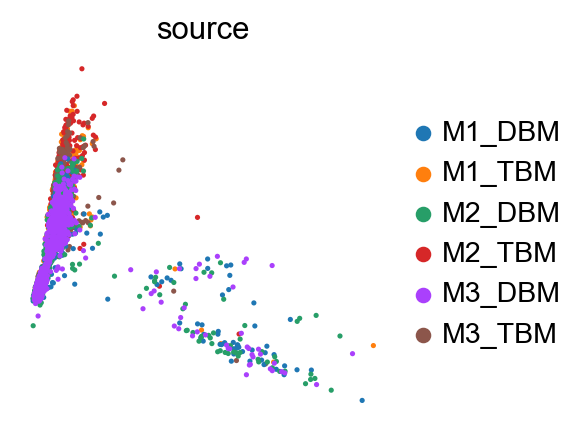

D:\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8942 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8942 missing from current font.
  font.set_text(s, 0, flags=flags)


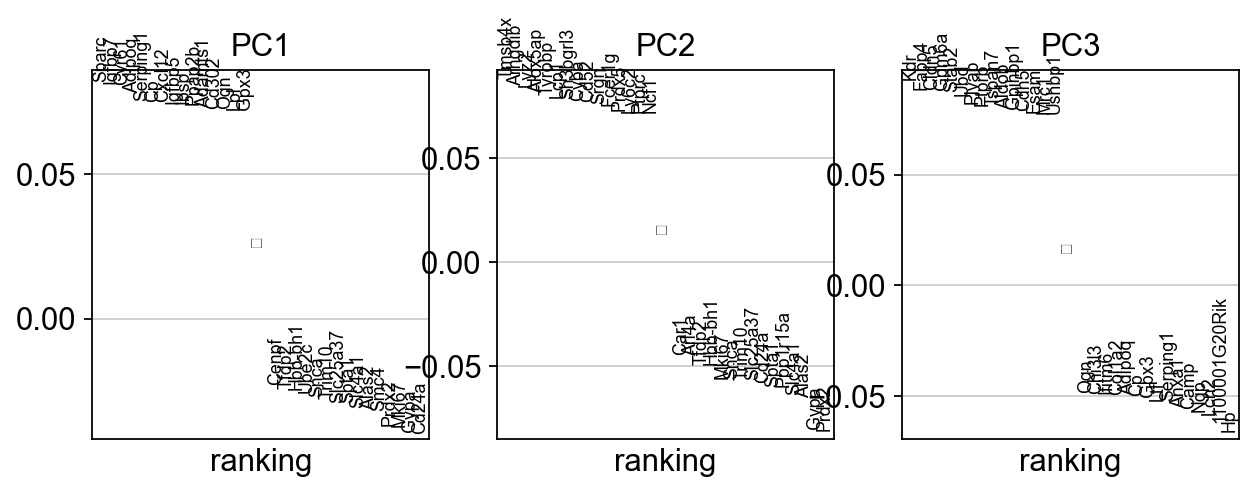

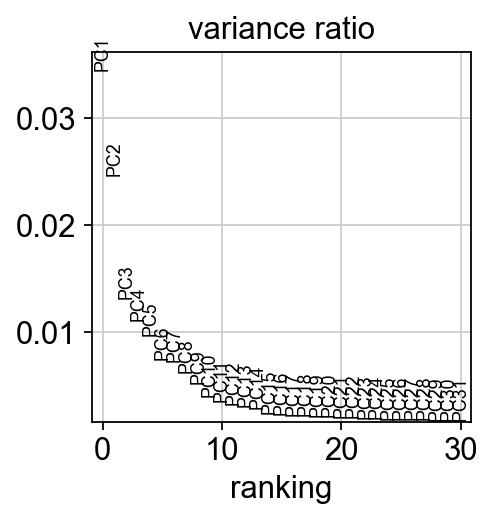

In [9]:
sc.pl.pca_overview(adata,color='source')

In [10]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=11, random_state=0)
sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 11
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:01:17)


In [11]:
sc.tl.louvain(adata, resolution=3.1)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 30 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:01)


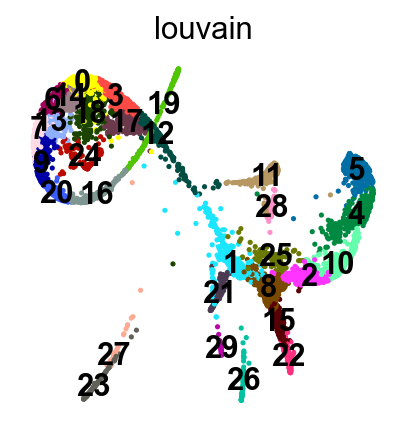

In [12]:
sc.pl.draw_graph(adata, color='louvain', legend_loc='on data')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


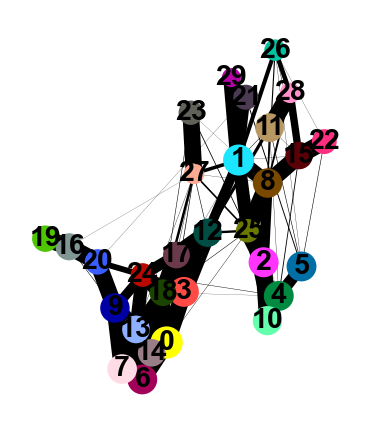

In [13]:
sc.tl.paga(adata, groups='louvain')
sc.pl.paga(adata, color=['louvain'])

In [14]:
adata.obs['Cluster'] = adata.obs['louvain']

In [15]:
adata

AnnData object with n_obs × n_vars = 5512 × 16592
    obs: 'Specimen', 'Population', 'source', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'louvain', 'Cluster'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'source_colors', 'pca', 'neighbors', 'draw_graph', 'louvain', 'louvain_colors', 'paga', 'louvain_sizes'
    obsm: 'X_pca', 'X_draw_graph_fa'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [16]:
adata.obs = adata.obs.astype({'Cluster': 'int64'})
adata.obs

,Specimen,Population,source,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,louvain,Cluster
M1_TBM_PCR2-4_altered_out_gene_exon_AGGCCATTGGGC,M1,TBM,M1_TBM,4859,4874,22743.0,516.0,2.268830,24,24
M1_TBM_PCR2-4_altered_out_gene_exon_GCTGGATCGCTT,M1,TBM,M1_TBM,4079,4093,16328.0,328.0,2.008819,4,4
M1_TBM_PCR2-4_altered_out_gene_exon_CGACTTATCTTC,M1,TBM,M1_TBM,3607,3620,12809.0,354.0,2.763682,24,24
M1_TBM_PCR2-4_altered_out_gene_exon_CTAATCTGTTAG,M1,TBM,M1_TBM,3289,3304,9527.0,323.0,3.390364,17,17
M1_TBM_PCR2-4_altered_out_gene_exon_AGTTATGGTTCG,M1,TBM,M1_TBM,3326,3340,9527.0,313.0,3.285399,17,17
...,...,...,...,...,...,...,...,...,...,...
M3_DBM_PCR2-9_altered_out_gene_exon_TCTCGCTGGGGG,M3,DBM,M3_DBM,255,256,352.0,3.0,0.852273,23,23
M3_DBM_PCR2-9_altered_out_gene_exon_GTTCCCGGCCAC,M3,DBM,M3_DBM,1226,1234,2123.0,35.0,1.648610,3,3
M3_DBM_PCR2-9_altered_out_gene_exon_GCGCACCAGATT,M3,DBM,M3_DBM,207,210,471.0,15.0,3.184713,7,7
M3_DBM_PCR2-9_altered_out_gene_exon_TCCCAATAGGTG,M3,DBM,M3_DBM,235,238,351.0,16.0,4.558404,3,3


In [17]:
adata.obs = adata.obs.merge(anno, on='Cluster', how='left')

D:\Miniconda3\lib\site-packages\anndata\_core\anndata.py:794: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


AnnData object with n_obs × n_vars = 5512 × 16592
    obs: 'Specimen', 'Population', 'source', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'louvain', 'Cluster', 'DPcolor', 'CellLabel', 'CellType', 'Dev_Branch'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'source_colors', 'pca', 'neighbors', 'draw_graph', 'louvain', 'louvain_colors', 'paga', 'louvain_sizes'
    obsm: 'X_pca', 'X_draw_graph_fa'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [18]:
adata.obs

,Specimen,Population,source,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,louvain,Cluster,DPcolor,CellLabel,CellType,Dev_Branch
0,M1,TBM,M1_TBM,4859,4874,22743.0,516.0,2.268830,24,24,NaN,9,Erythroblasts,Erythropoieisis
1,M1,TBM,M1_TBM,4079,4093,16328.0,328.0,2.008819,4,4,'#c03d23',5,Myelocytes,Granulopoieisis
2,M1,TBM,M1_TBM,3607,3620,12809.0,354.0,2.763682,24,24,NaN,9,Erythroblasts,Erythropoieisis
3,M1,TBM,M1_TBM,3289,3304,9527.0,323.0,3.390364,17,17,'#66a61e',9,Erythroblasts,Erythropoieisis
4,M1,TBM,M1_TBM,3326,3340,9527.0,313.0,3.285399,17,17,'#66a61e',9,Erythroblasts,Erythropoieisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,M3,DBM,M3_DBM,255,256,352.0,3.0,0.852273,23,23,NaN,14,Pericytes,Vasculature
5508,M3,DBM,M3_DBM,1226,1234,2123.0,35.0,1.648610,3,3,'#ef6548',9,Erythroblasts,Erythropoieisis
5509,M3,DBM,M3_DBM,207,210,471.0,15.0,3.184713,7,7,'#984ea3',9,Erythroblasts,Erythropoieisis
5510,M3,DBM,M3_DBM,235,238,351.0,16.0,4.558404,3,3,'#ef6548',9,Erythroblasts,Erythropoieisis


computing tSNE
    using 'X_pca' with n_pcs = 11
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:33)


D:\Miniconda3\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'DPcolor' as categorical
D:\Miniconda3\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'CellType' as categorical
D:\Miniconda3\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical

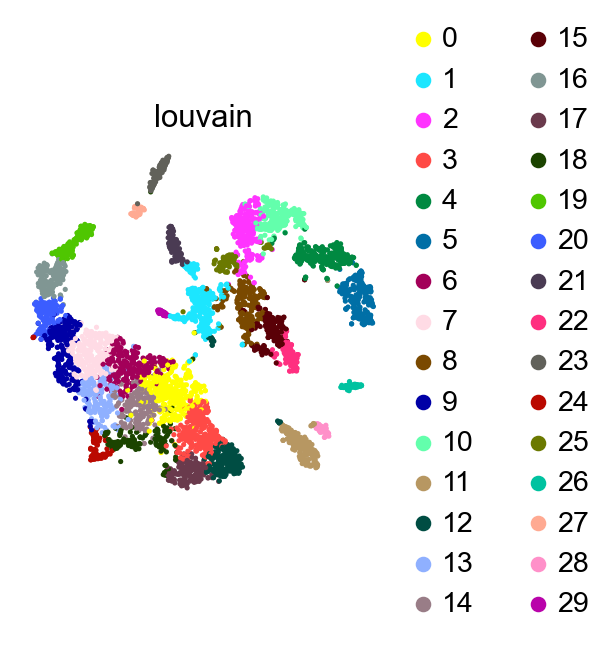

In [19]:
sc.tl.tsne(adata,n_pcs=11,random_state=0)
sc.pl.tsne(adata,color='louvain')

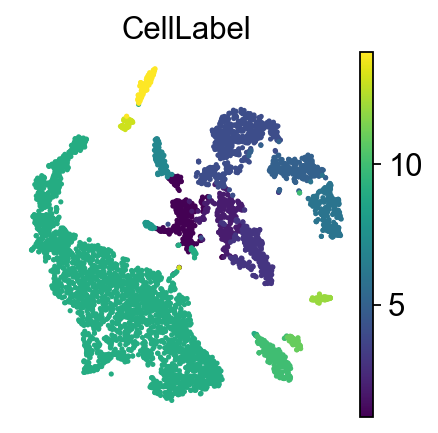

In [20]:
sc.pl.tsne(adata,color='CellLabel')

(array([ 96., 265., 165., 239.,  52., 182.,  36., 270., 162., 119., 250.,
        210.,  63., 310., 186., 248., 190., 263., 221., 266., 262., 155.,
        172., 133., 122., 255., 368., 109.,  50.,  93.]),
 array([ 0.        ,  0.96666667,  1.93333333,  2.9       ,  3.86666667,
         4.83333333,  5.8       ,  6.76666667,  7.73333333,  8.7       ,
         9.66666667, 10.63333333, 11.6       , 12.56666667, 13.53333333,
        14.5       , 15.46666667, 16.43333333, 17.4       , 18.36666667,
        19.33333333, 20.3       , 21.26666667, 22.23333333, 23.2       ,
        24.16666667, 25.13333333, 26.1       , 27.06666667, 28.03333333,
        29.        ]),
 <BarContainer object of 30 artists>)

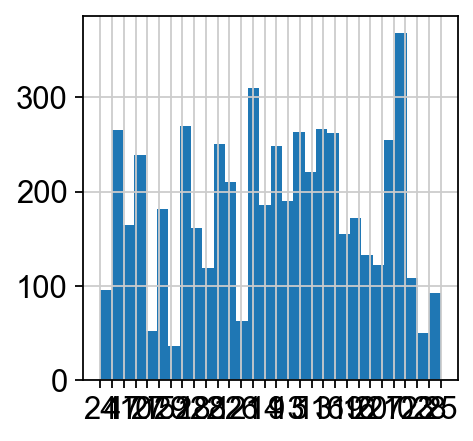

In [21]:
plt.hist(adata.obs.louvain,bins=30)

(array([ 310.,  250.,  301.,  602.,  265.,  263.,  122.,   36., 2868.,
         221.,   50.,   63.,   52.,  109.]),
 array([ 1.        ,  1.92857143,  2.85714286,  3.78571429,  4.71428571,
         5.64285714,  6.57142857,  7.5       ,  8.42857143,  9.35714286,
        10.28571429, 11.21428571, 12.14285714, 13.07142857, 14.        ]),
 <BarContainer object of 14 artists>)

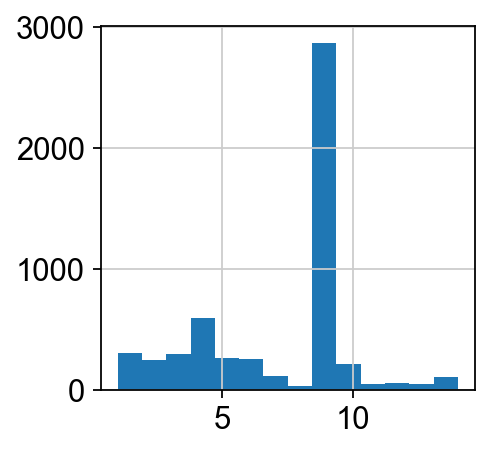

In [22]:
plt.hist(adata.obs.CellLabel,bins=14)

In [23]:
adata

AnnData object with n_obs × n_vars = 5512 × 16592
    obs: 'Specimen', 'Population', 'source', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'louvain', 'louvain_anno'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'source_colors', 'pca', 'neighbors', 'draw_graph', 'louvain', 'louvain_colors', 'paga', 'louvain_sizes', 'tsne'
    obsm: 'X_pca', 'X_draw_graph_fa', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [23]:
adata.write_h5ad('3 clustered_mou_0831_anno.h5ad')

In [2]:
adata = sc.read_h5ad('3 clustered_mou_0831_anno.h5ad')

In [6]:
adata.obs = adata.obs.astype({'CellLabel': 'category'})

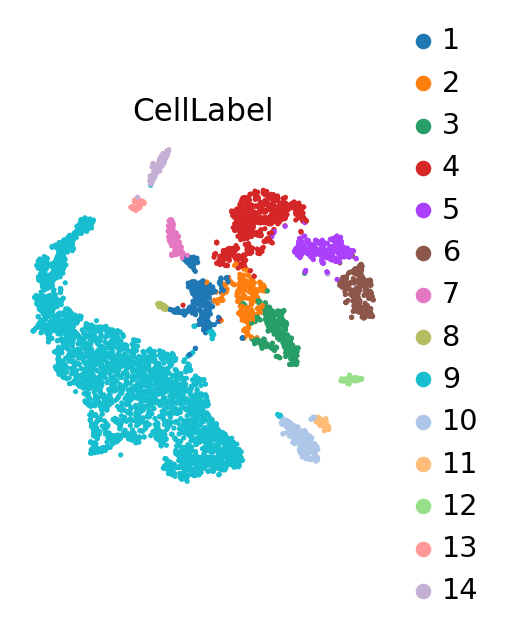

In [9]:
sc.pl.tsne(adata,color='CellLabel')

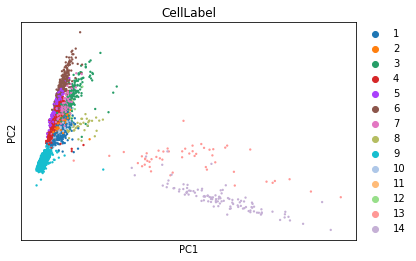

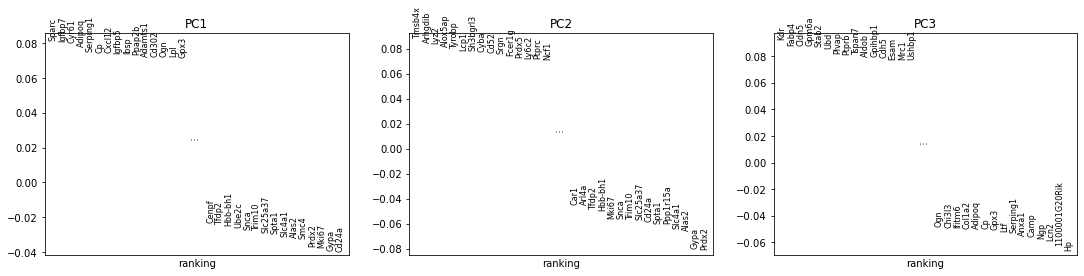

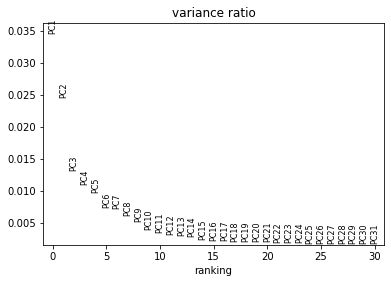

In [3]:
sc.pl.pca_overview(adata,color='CellLabel')

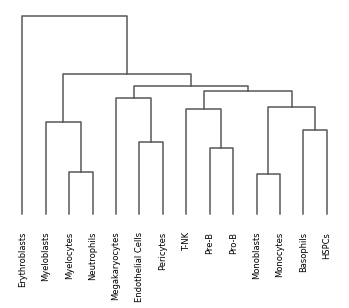

<AxesSubplot:>

In [7]:
sc.tl.dendrogram(adata, groupby='CellLabel')
sc.pl.dendrogram(adata, groupby='CellType')